# Применение алгоритмов кластеризации для диагностики кризиса теплообмена в ЯЭУ
Архипов Дмитрий Алексеевич ИВТ-М20.

## Импорт всех необходимых библиотек.

In [57]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralBiclustering
import matplotlib.pyplot as plt


## Считываем данные в датафреймы. Для таргета переименовываем колонку для упрощения обращения к оной.

In [77]:
target = pd.DataFrame(pd.read_csv('data/target1.csv', header=0))
target.columns = ['index']
var = pd.DataFrame(pd.read_csv('data/var1.csv', sep=',', header=None))

## Трнаспонирование матрицы. Каждый столбец будет спектром с 200 частотами.

In [6]:
varT = var.T


## Начало и конец для исходных матриц, и для транспонированой матрицы.

In [7]:
target.head()

,index
0,1
1,1
2,1
3,1
4,1


In [8]:
target.tail()

,index
55,2
56,2
57,2
58,2
59,2


In [ ]:
var.head()

In [ ]:
var.tail()

In [ ]:
varT.head()

In [9]:
varT.tail()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
195,3.125680,3.267026,3.029492,2.656386,3.623183,4.330039,4.331383,6.165689,6.248261,4.214335,...,5.077341,4.567783,4.389208,3.262275,4.388935,4.277942,4.348785,3.725290,4.228943,4.476239
196,4.389479,4.359180,3.221400,3.272562,6.670483,2.454472,4.387610,3.925381,7.037519,4.579577,...,3.234667,2.214661,2.054102,3.423455,3.866602,3.419940,1.252499,3.879549,2.285904,4.139352
197,3.460729,2.608956,2.454002,3.670229,3.329430,3.826743,2.942408,3.113872,2.900196,2.598997,...,4.024269,4.336321,4.026444,2.767669,4.792355,3.798945,3.023498,2.883247,3.233596,2.703587
198,4.470180,3.903345,2.881283,3.905332,5.923117,3.707086,4.124207,4.378209,6.493159,4.002899,...,3.596307,4.084645,2.264698,2.674313,4.188550,5.081380,2.009719,4.607514,2.606208,4.451271
199,3.668878,3.358269,2.952321,4.054018,2.557104,4.528353,2.878989,4.157906,3.649004,2.838819,...,5.109505,4.196226,4.674658,2.420840,5.326448,3.675210,4.156490,2.993956,3.659502,2.902575


График врменных реализаций каждого спектра.

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

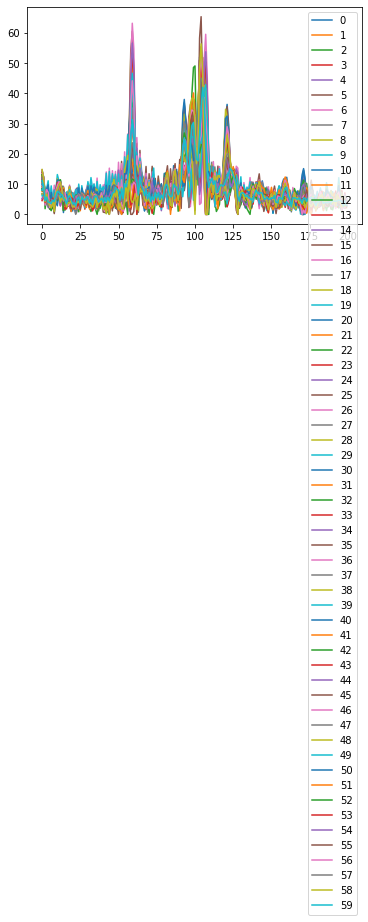

In [10]:
plt.figure()
varT.plot()

## График временной реализации для двух случайных спектров

<AxesSubplot:>

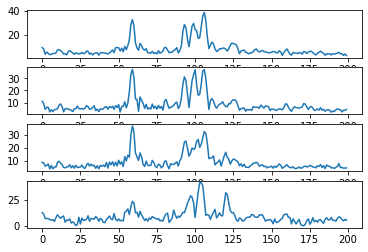

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=1)

varT[6].plot(ax=axes[0])
varT[5].plot(ax=axes[1])
varT[32].plot(ax=axes[2])
varT[47].plot(ax=axes[3])

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],


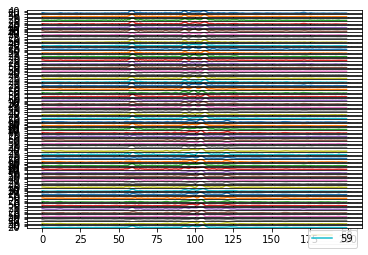

In [24]:
varT.plot(subplots=True, layout=(60,1))

## Мощность каждого спектра.

In [30]:
varPower = round(varT.sum(axis = 0), 1)
print(varPower)


0     1655.2
1     1796.4
2     1730.1
3     1681.8
4     1659.5
5     1664.4
6     1634.7
7     1738.3
8     1905.2
9     1689.1
10    1631.4
11    1851.7
12    1560.7
13    1796.3
14    1704.3
15    1926.6
16    1922.2
17    1640.7
18    1663.7
19    1744.8
20    1696.5
21    1591.1
22    1383.6
23    1713.9
24    1816.9
25    1549.5
26    1468.2
27    1661.7
28    1671.7
29    1686.3
30    1740.8
31    1684.9
32    1717.4
33    1582.8
34    1689.1
35    1507.8
36    1575.4
37    1715.1
38    1602.2
39    1940.3
40    1591.9
41    1723.7
42    1684.8
43    1732.3
44    1650.9
45    1696.4
46    1810.3
47    1777.6
48    1855.2
49    1666.0
50    1798.3
51    1504.3
52    1595.8
53    1514.8
54    1671.5
55    1576.4
56    1663.7
57    1647.3
58    1561.5
59    1662.4
dtype: float64


## График распределения целевой переменной target. И фиксация начала кризиса.

30


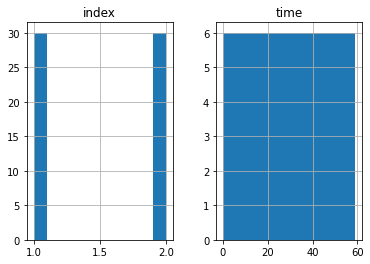

In [51]:
target.hist()
targetTimed = target
targetTimed['time'] = target.index
#print(target)
crysisLine = targetTimed[targetTimed['index']>=2].iloc[0]['time']
print(crysisLine)


## График мощности спектра с указанием начала кризиса.

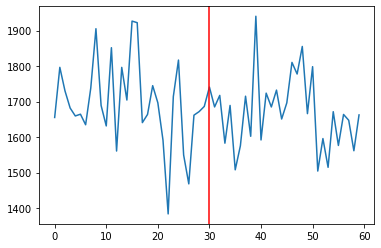

In [32]:
varplot = varPower.plot()
varplot.axvline(x = crysisLine, color='r')


## Описательные статистики мощностей до и после начала кризиса.

In [33]:
varPowerBefore = varPower[0:crysisLine]
varPowerAfter = varPower[crysisLine:]
varPower.describe()


count      60.000000
mean     1682.956667
std       112.291545
min      1383.600000
25%      1624.100000
50%      1676.750000
75%      1733.800000
max      1940.300000
dtype: float64

In [34]:
varPBboxplot = varPowerBefore.describe()
print(varPBboxplot)

count      30.000000
mean     1694.550000
std       121.933271
min      1383.600000
25%      1644.325000
50%      1684.050000
75%      1743.175000
max      1926.600000
dtype: float64


In [35]:
varPAboxplot = varPowerAfter.describe()
print(varPAboxplot)


count      30.000000
mean     1671.363333
std       102.507492
min      1504.300000
25%      1592.875000
50%      1668.750000
75%      1722.125000
max      1940.300000
dtype: float64


## Добавление к графику средние значения мощности спектра до кризиса и после.

1671.3633333333335
1694.5499999999997


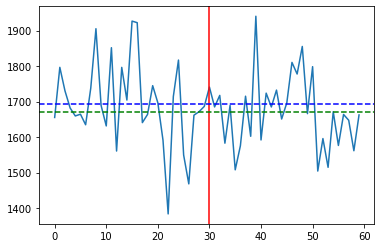

In [36]:
print(varPowerAfter.mean())
print(varPowerBefore.mean())

varplot = varPower.plot()
varplot.axvline(x = crysisLine, color='r')
varplot.axhline(y = varPowerAfter.mean(), color='g', linestyle = '--')
varplot.axhline(y = varPowerBefore.mean(), color='b', linestyle = '--')


## График боксплотов мощности спектра до кризиса и после.

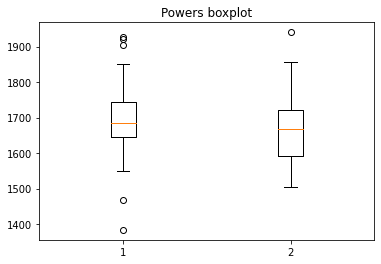

In [37]:
data = [varPowerBefore, varPowerAfter]
fig1, ax1 = plt.subplots()
ax1.set_title('Powers boxplot')
ax1.boxplot(data);


По итогу за счет графика временной реализации спектров можно заметить ступенчатый переход в частотах.
Из графиков мощности не удалось подчерпнуть полезной информации.
Аналогичная ситуация с боксплотами.

# Работа с частотой спектра.

## Находим среднюю частоту спектра.

In [54]:
print(varT[5])

0      11.054668
1       9.338379
2       4.523733
3       6.223527
4       6.199316
         ...    
195     4.330039
196     2.454472
197     3.826743
198     3.707086
199     4.528353
Name: 5, Length: 200, dtype: float64


In [55]:
def mean_frq(data):
    mfr = []
    for col in data.columns:
        mfr.append((np.arange(1,201) * data[col]).sum() / data[col].sum())
    return pd.Series(mfr)


In [69]:
varPowerFrequency = mean_frq(varT)
print(varPowerFrequency)


0      96.218115
1      93.806066
2      94.462495
3      94.793998
4      95.719471
5      96.345726
6      97.244689
7      97.033640
8      93.748527
9      96.438583
10     98.890243
11     93.083845
12     97.192510
13     94.779251
14     96.144230
15     93.104393
16     91.981657
17     95.434245
18     97.869942
19     95.617350
20     96.297557
21     97.231804
22    101.978148
23     94.145310
24     93.299025
25     97.816476
26     99.073047
27     95.228158
28     96.261216
29     94.374876
30     97.548123
31     96.276925
32     95.865117
33     99.949680
34     97.671917
35    102.611465
36    101.008162
37     97.767776
38     99.411125
39     93.799893
40     99.341690
41     98.127423
42     96.723079
43     97.441685
44     99.106257
45     98.892227
46     94.425741
47     98.136622
48     96.118132
49     96.522086
50     95.989402
51    100.841582
52     99.458398
53    100.774286
54     97.332361
55     98.555578
56     98.538414
57     97.367750
58    101.1023

## График частоты с указанием момнта началы кризиса.

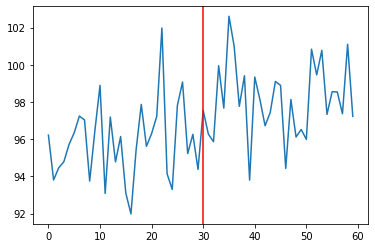

In [70]:
varplot = varPowerFrequency.plot()
varplot.axvline(x = crysisLine, color='r')


## Описательные статистики частот до и после начала кризиса.

In [71]:
varPowerFreqBefore = varPowerFrequency[0:crysisLine]
varPowerFreqAfter = varPowerFrequency[crysisLine:]
varPowerFrequency.describe()

count     60.000000
mean      96.992437
std        2.348265
min       91.981657
25%       95.571574
50%       97.113075
75%       98.542705
max      102.611465
dtype: float64

In [72]:
varPBFreqboxplot = varPowerFreqBefore.describe()
print(varPBboxplot)

count      30.000000
mean     1694.550000
std       121.933271
min      1383.600000
25%      1644.325000
50%      1684.050000
75%      1743.175000
max      1926.600000
dtype: float64


In [73]:
varPAFreqboxplot = varPowerFreqAfter.describe()
print(varPAboxplot)


count      30.000000
mean     1671.363333
std       102.507492
min      1504.300000
25%      1592.875000
50%      1668.750000
75%      1722.125000
max      1940.300000
dtype: float64


## Добавление к существующему графику средних значений частот до и после кризиса.

98.13105462338926
95.8538197156588


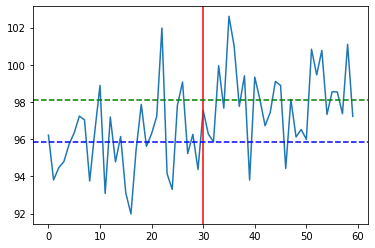

In [74]:
print(varPowerFreqAfter.mean())
print(varPowerFreqBefore.mean())

varplot = varPowerFrequency.plot()
varplot.axvline(x = crysisLine, color='r')
varplot.axhline(y = varPowerFreqAfter.mean(), color='g', linestyle = '--')
varplot.axhline(y = varPowerFreqBefore.mean(), color='b', linestyle = '--')


## График боксплотов частот до и после кризиса

{'whiskers': [<matplotlib.lines.Line2D at 0x1c343a11b08>,
 'caps': [<matplotlib.lines.Line2D at 0x1c343a5ec88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c343a5e608>,
 'medians': [<matplotlib.lines.Line2D at 0x1c343a63dc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c343a63d88>,
 'means': []}

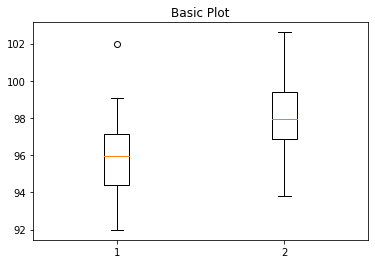

In [78]:
data = [varPowerFreqBefore, varPowerFreqAfter]
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

По итогу:
Из графиков мощности не удалось подчерпнуть полезной информации.
Аналогичная ситуация с боксплотами.

## График мощностей и частот с указанием в каких точках начался кризис

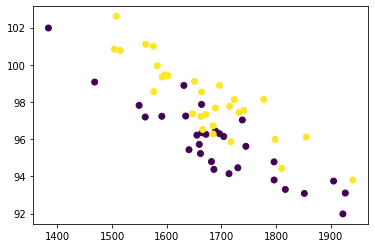

In [79]:
fig, ax = plt.subplots()
ax.scatter(varPower, varPowerFrequency, c=target['index'])

## Графики двух случайных частот.

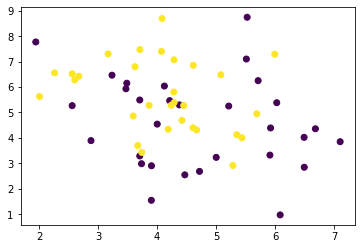

In [104]:
sample = varT.sample(2)
list(sample.index)

plt.scatter(sample.iloc[0,:], sample.iloc[1,:], c=target['index'])

## Метод понижения размерности

In [46]:
pca = PCA(n_components=2)
pca.fit(varT)

PCA(n_components=2)

## Применения 3-х методов кластеризации.

In [47]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(varT)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [48]:
clustering = AgglomerativeClustering(n_clusters=2).fit(varT)
clustering
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [49]:
clustering = SpectralBiclustering(n_clusters=2, random_state=0).fit(varT)
clustering.row_labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [50]:
clustering.column_labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

## Вопросы.

## 1.Какие существуют алгоритмы кластерного анализа данных?

Алгоритмы иерархической кластеризации:

Среди алгоритмов иерархической кластеризации выделяются два основных типа: восходящие и нисходящие алгоритмы.

Нисходящие алгоритмы работают по принципу «сверху-вниз»: в начале все объекты помещаются в один кластер, который затем разбивается на все более мелкие кластеры. Более распространены восходящие алгоритмы, которые в начале работы помещают каждый объект в отдельный кластер, а затем объединяют кластеры во все более крупные, пока все объекты выборки не будут содержаться в одном кластере. Таким образом строится система вложенных разбиений. Результаты таких алгоритмов обычно представляют в виде дерева – дендрограммы. Классический пример такого дерева – классификация животных и растений.


Для вычисления расстояний между кластерами чаще все пользуются двумя расстояниями: одиночной связью или полной связью.
К недостатку иерархических алгоритмов можно отнести систему полных разбиений, которая может являться излишней в контексте решаемой задачи.

### Алгоритмы квадратичной ошибки:
Задачу кластеризации можно рассматривать как построение оптимального разбиения объектов на группы.
При этом оптимальность может быть определена как требование минимизации среднеквадратической ошибки разбиения, где cj — «центр масс» кластера j (точка со средними значениями характеристик для данного кластера).
Алгоритмы квадратичной ошибки относятся к типу плоских алгоритмов.

Самым распространенным алгоритмом этой категории является метод k-средних. Этот алгоритм строит заданное число кластеров, расположенных как можно дальше друг от друга. Работа алгоритма делится на несколько этапов:

•	Случайно выбрать k точек, являющихся начальными «центрами масс» кластеров.

•	Отнести каждый объект к кластеру с ближайшим «центром масс».

•	Пересчитать «центры масс» кластеров согласно их текущему составу.

•	Если критерий остановки алгоритма не удовлетворен, вернуться к п. 2.

В качестве критерия остановки работы алгоритма обычно выбирают минимальное изменение среднеквадратической ошибки. Так же возможно останавливать работу алгоритма, если на шаге 2 не было объектов, переместившихся из кластера в кластер.
К недостаткам данного алгоритма можно отнести необходимость задавать количество кластеров для разбиения.

### Нечеткие алгоритмы:
Наиболее популярным алгоритмом нечеткой кластеризации является алгоритм c-средних (c-means).
Он представляет собой модификацию метода k-средних.

Шаги работы алгоритма:

•	Выбрать начальное нечеткое разбиение n объектов на k кластеров путем выбора матрицы принадлежности U размера n x k.

•	Используя матрицу U, найти значение критерия нечеткой ошибки:

•	Перегруппировать объекты с целью уменьшения этого значения критерия нечеткой ошибки.

•	Возвращаться в п. 2 до тех пор, пока изменения матрицы U не станут незначительными.

Этот алгоритм может не подойти, если заранее неизвестно число кластеров, либо необходимо однозначно отнести каждый объект к одному кластеру.
Алгоритм выделения связных компонент:
В алгоритме выделения связных компонент задается входной параметр R и в графе удаляются все ребра, для которых «расстояния» больше R. Соединенными остаются только наиболее близкие пары объектов. Смысл алгоритма заключается в том, чтобы подобрать такое значение R, лежащее в диапазон всех «расстояний», при котором граф «развалится» на несколько связных компонент. Полученные компоненты и есть кластеры.
Для подбора параметра R обычно строится гистограмма распределений попарных расстояний. В задачах с хорошо выраженной кластерной структурой данных на гистограмме будет два пика – один соответствует внутрикластерным расстояниям, второй – межкластерным расстояния. Параметр R подбирается из зоны минимума между этими пиками. При этом управлять количеством кластеров при помощи порога расстояния довольно затруднительно.

 ## 2. Какие метрики используются для оценки качества работы алгоритма кластеризации данных? Опишите данные метрики с математической точки зрения и скажите чем они отличаются друг от друга.
Метод оценки качества кластеризации — инструментарий для количественной оценки результатов кластеризации.

Для самих метрик качества обычно вводят следующую классификацию: Внутренние – к ним относятся метрики, которые при оценке качества используют какую-либо уже известную информацию о структуре кластеров, существующей в рассматриваемом множестве. Как правило, такие метрики применяются при оценке эффективности работы алгоритма кластеризации, когда в качестве тестового множества используется какое-либо множество данных с известной структурой классов.
	Внешние – к ним относятся метрики, которые не имеют априори знаний о структуре классов и при оценке опираются только на ту информацию, которую можно получить, опираясь на множество данных. Для внешних метрик рассматриваются пары (xi ; xj ) из элементов X (кластеризуемое множество) и считаются количество пар которые по своей сути связаны с такими показателями как правильность точность и полнота.
	Рассчитываются следующие пары:
* 1) элементы принадлежат одному кластеру и одному классу: SS;
* 2) элементы принадлежат одному кластеру, но разным классам: SD;
* 3) элементы принадлежат разным кластерам, но одному классу: DS;
* 4) элементы принадлежат разным классам и разным кластерам: DD.

Относительные – оценивают качество, сравнивая несколько кластерных структур между собой, не имея априорной информации и принимая в расчет только сведения о кластерной структуре и кластеризуемом множестве

## 3.Каким способом можно повысить качество работы алгоритмов кластеризации?

Для повышения качества требуется соблюсти нормы оценки качества кластеризации. Для этого задачу можно переформулировать в терминах задачи дискретной оптимизации. Необходима так сопоставить объектам из множества X метки кластеров, чтобы значение выбранного функционала качества приняло наилучшее значение. В качестве примера, стремятся достичь минимума среднего внутрикластерного расстояния $$F_0=\frac{\sum_{i<j}[y_i=y_j]*\rho(x_i,x_j)}{\sum_{i<j}[y_i=y_j]}$$ или максимума среднего межкластерного расстояния $$F_1=\frac{\sum_{i<j}[y_i\not=y_j]*\rho(x_i,x_j)}{\sum_{i<j}[y_i\not=y_j]}$$.